# Artificial Neural Network

### Importing the libraries

In [429]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [430]:
import seaborn as sn

In [431]:
import matplotlib.pyplot as plt

In [432]:
# # too see max columns
# pd.set_option('display.max_columns',None)

In [433]:
tf.__version__

'2.10.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [434]:
df= pd.read_csv(r'https://raw.githubusercontent.com/gnaneshwari1802/NareshDataScienceTasksAndProjects/main/21.%20Artificial%20Neural%20Networks/Churn_Modelling.csv')

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [436]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [437]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [438]:
# we didn't require customerID so we drop it
df = df.drop('CustomerId',axis=1)

In [439]:
df.isnull().sum()

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [440]:
# we didn't require customerID so we drop it
df = df.drop('Surname',axis=1)

In [441]:
#numerical variables

num = list(df.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df.select_dtypes(include='O').keys())

print(cat)

print(num)

['Geography', 'Gender']
['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [442]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [443]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [444]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [445]:
dataset=df

In [446]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming you have already fitted the LabelEncoder to your 'Geography' column
# label_encoder_geography = LabelEncoder()
# # Assuming 'geography_column' is your 'Geography' column
# label_encoder_geography.fit(geography_column)

# # Get the classes
# label_encoder_geography_classes = label_encoder_geography.classes_

# print("Encoded classes for Geography:", label_encoder_geography_classes)


In [447]:
from sklearn.preprocessing import LabelEncoder
label_encoder_geography = LabelEncoder()
dataset['Geography']=label_encoder_geography.fit_transform(dataset['Geography'])

# Get the classes
label_encoder_geography_classes = label_encoder_geography.classes_

print("Encoded classes for Geography:", label_encoder_geography_classes)

label_encoder_gender = LabelEncoder()
dataset['Gender']=label_encoder_gender.fit_transform(dataset['Gender'])
# df['PaymentMethod'] = label.fit_transform(df['PaymentMethod'])

# Get the classes
label_encoder_gender_classes = label_encoder_gender.classes_

print("Encoded classes for Gender:", label_encoder_gender_classes)

Encoded classes for Geography: ['France' 'Germany' 'Spain']
Encoded classes for Gender: ['Female' 'Male']


In [448]:
dataset

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [449]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  int32  
 3   Gender           10000 non-null  int32  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(8)
memory usage: 859.5 KB


In [450]:

# X = dataset.iloc[:, 3:-1].values
# y = dataset.iloc[:, -1].values

In [451]:
dataset.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [458]:
scale_cols =[ 'RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited']
# now we scling all the data 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
dataset[scale_cols] = scale.fit_transform(dataset[scale_cols])

In [459]:
# independent and dependent variables
x = dataset.drop('Exited',axis=1)
y = dataset['Exited']

In [460]:

# #Create dummy variables
# geography=pd.get_dummies(X["Geography"],drop_first=True)
# gender=pd.get_dummies(X['Gender'],drop_first=True)

# ## Concatenate the Data Frames

# X=pd.concat([X,geography,gender],axis=1)

# ## Drop Unnecessary columns
# X=X.drop(['Geography','Gender'],axis=1)

In [461]:
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


In [462]:
print(y)

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: Exited, Length: 10000, dtype: float64


### Encoding categorical data

Label Encoding the "Gender" column

In [463]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# X[:, 2] = le.fit_transform(X[:, 2])

In [464]:
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


One Hot Encoding the "Geography" column

In [465]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [466]:
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


### Feature Scaling

In [467]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)

In [468]:
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


### Splitting the dataset into the Training set and Test set

In [469]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [470]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [471]:
from sklearn.preprocessing import OrdinalEncoder

In [472]:
# # prepare input data
# def prepare_inputs(X_train, X_test):
# 	oe = OrdinalEncoder()
# 	oe.fit(X_train)
# 	X_train_enc = oe.transform(X_train)
# 	X_test_enc = oe.transform(X_test)
# 	return X_train_enc, X_test_enc

In [473]:
# # prepare target
# def prepare_targets(y_train, y_test):
#  le = LabelEncoder()
#  le.fit(y_train)
#  y_train_enc = le.transform(y_train)
#  y_test_enc = le.transform(y_test)
#  return y_train_enc, y_test_enc

In [474]:
# # prepare input data
# X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# # prepare output data
# y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [475]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [476]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [477]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [478]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# classifier.add(Dense(units=1,activation='relu'))


In [479]:
# # Adding the input layer and the first hidden layer

# classifier.add(Dense(output_dim = 11, init = 'he_uniform',activation='relu',input_dim = 11))
# # 1st HL i will consider for 6 neurons, init - initiliazaton parameter, weights need to be initialise, 
# #classifier.add(Dense(units = 10, kernel_initializer = 'he_normal',activation='relu',input_dim = 11))
# #classifier.add(Dropout(0.3))

# # Adding the second hidden layer
# #classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 11, kernel_initializer = 'he_normal',activation='relu'))
# #classifier.add(Dropout(0.4))

# # Adding the third hidden layer

# classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))
# #classifier.add(Dropout(0.2))

# # Adding the output layer
# #classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))
# classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


# # Compiling the ANN
# classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# # Fitting the ANN to the Training set
# model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 10)
# # reason why i take validation_split because test my data separately



## Training the ANN

### Compiling the ANN

In [480]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [481]:
# model_history=ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
# model_history = ann.fit(y_train, y_test, batch_size=32, epochs=100, validation_data=(X, y))
model_history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5428 - accuracy: 0.7836 - val_loss: 0.4824 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7960 - val_loss: 0.4513 - val_accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7960 - val_loss: 0.4415 - val_accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.7960 - val_loss: 0.4378 - val_accuracy: 0.7975
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.7960 - val_loss: 0.4353 - val_accuracy: 0.7975
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.7960 - val_loss: 0.4327 - val_accuracy: 0.7975
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.7960 - val_loss: 0.4302 - val_accuracy: 0.7975

In [482]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


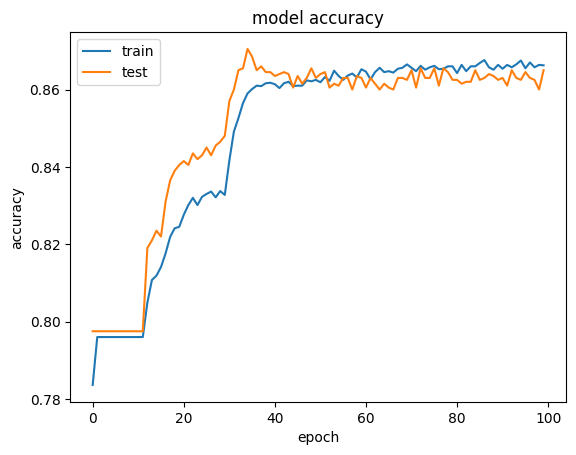

In [483]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

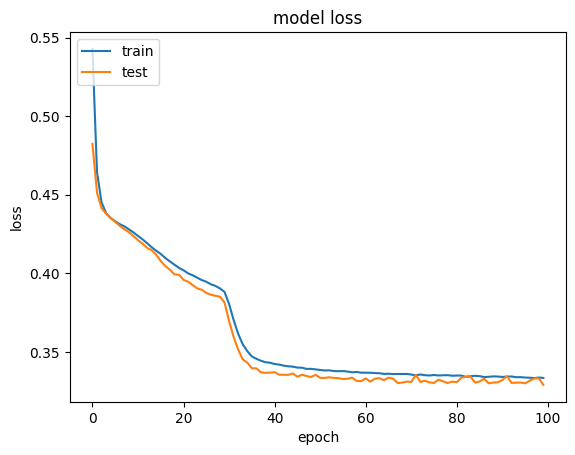

In [484]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

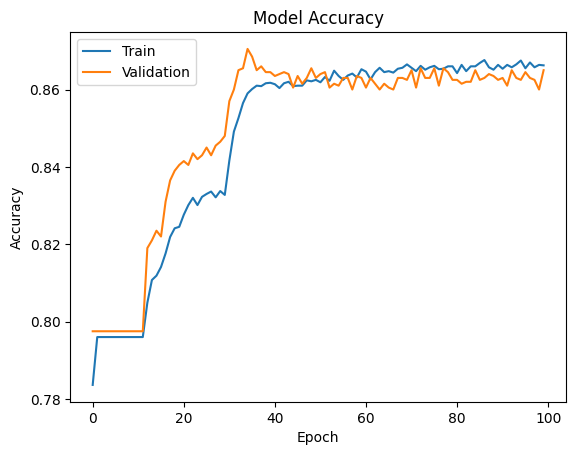

In [485]:
# summarize history for accuracy
if 'accuracy' in model_history.history:
    train_acc = model_history.history['accuracy']
    val_acc = model_history.history['val_accuracy']
elif 'acc' in model_history.history:
    train_acc = model_history.history['acc']
    val_acc = model_history.history['val_acc']

# Plot accuracy
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# This code will check for both 'accuracy' and 'acc' keys in model_history and plot the appropriate accuracy based on which key is found.

# Make sure to use the correct key depending on your specific TensorFlow/Keras version.




# Was this response better or worse?

# Better

# Worse

# Same




## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [486]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


### Making the Confusion Matrix

In [487]:
score

0.8585

In [488]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


63/63 [==============================] - 0s 993us/step
Accuracy: 0.865
Precision: 0.7490774907749077
Recall: 0.5012345679012346
F1 Score: 0.6005917159763313
Confusion Matrix:
[[1527   68]
 [ 202  203]]
ROC AUC Score: 0.7293006695305546


Text(183.22222222222223, 0.5, 'True_number')

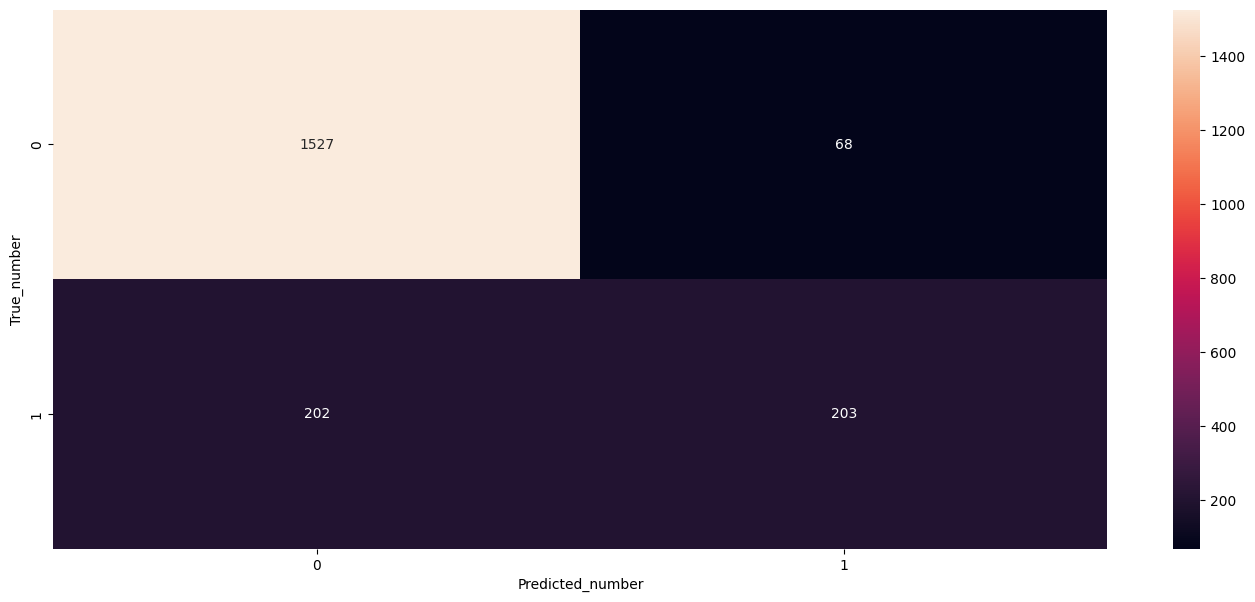

In [489]:
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (17,7))
sn.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

In [490]:
geography = input("Enter Geography (e.g., France, Spain, Germany): ")
geography_encoded = label_encoder_geography.transform([geography])

Enter Geography (e.g., France, Spain, Germany):  Germany


In [491]:
geography_encoded

array([1])

In [492]:
# import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import load_model

# # Load the trained model
# model = load_model('path_to_your_model.h5')
# label_encoder_geography.classes_ = np.load('label_encoder_geography_classes.npy')
# label_encoder_gender.classes_ = np.load('label_encoder_gender_classes.npy')

# Function to preprocess user input
def preprocess_input(geography, gender, credit_score, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary):
    # Encode categorical variables
    geography_encoded = int(label_encoder_geography.transform([geography])[0])
    gender_encoded = int(label_encoder_gender.transform([gender])[0])
    
    # Create input array
    input_data = np.array([[credit_score, geography_encoded, gender_encoded, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary]])
     # Reshape input array for model prediction
    # input_data = input_array.reshape(1, -1)  # Reshape to a single sample with multiple features
    
    return input_data

# Function to make predictions
def predict_churn(input_data):
    prediction = ann.predict(input_data)
    return prediction

# Get user input

geography = input("Enter Geography (e.g., France, Spain, Germany): ")
geography = geography.capitalize()  # Convert the first letter to uppercase
gender = input("Enter Gender (e.g., Male, Female): ")
gender = gender.capitalize()  # Convert the first letter to uppercase
credit_score = float(input("Enter Credit Score: "))
age = int(input("Enter Age: "))
tenure = int(input("Enter Tenure: "))
balance = float(input("Enter Balance: "))
num_of_products = int(input("Enter Number of Products: "))
has_cr_card = int(input("Enter 1 if has credit card, otherwise 0: "))
is_active_member = int(input("Enter 1 if active member, otherwise 0: "))
estimated_salary = float(input("Enter Estimated Salary: "))

# Preprocess user input
input_data = preprocess_input(geography, gender, credit_score, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary)

# Make predictions
prediction = predict_churn(input_data)

# Display output
if prediction == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is not likely to churn.")


Enter Geography (e.g., France, Spain, Germany):  Germany
Enter Gender (e.g., Male, Female):  Female
Enter Credit Score:  1
Enter Age:  1
Enter Tenure:  1
Enter Balance:  1
Enter Number of Products:  1
Enter 1 if has credit card, otherwise 0:  1
Enter 1 if active member, otherwise 0:  1
Enter Estimated Salary:  1


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_7/dense_21/Relu' defined at (most recent call last):
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\ipykernel\kernelapp.py", line 701, in start
      self.io_loop.start()
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\asyncio\windows_events.py", line 321, in run_forever
      super().run_forever()
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell
      await result
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Gnaneshwari\AppData\Local\Temp\ipykernel_2324\1428939956.py", line 47, in <module>
      prediction = predict_churn(input_data)
    File "C:\Users\Gnaneshwari\AppData\Local\Temp\ipykernel_2324\1428939956.py", line 25, in predict_churn
      prediction = ann.predict(input_data)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_7/dense_21/Relu'
Matrix size-incompatible: In[0]: [1,10], In[1]: [12,6]
	 [[{{node sequential_7/dense_21/Relu}}]] [Op:__inference_predict_function_945057]